<a href="https://colab.research.google.com/github/mickeykubo/bi-matrix/blob/master/%E6%99%82%E7%B3%BB%E5%88%97%EF%BC%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

In [0]:
from fastai import *
from fastai.tabular import *


In [4]:
prsa = pd.read_csv("http://logopt.com/data/PRSA.csv")
prsa.dropna(inplace=True)
prsa["pmlog"] = np.log(prsa["pm2.5"]+0.001)
prsa.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4.997219
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,5.068910
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,5.198503
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4.927261


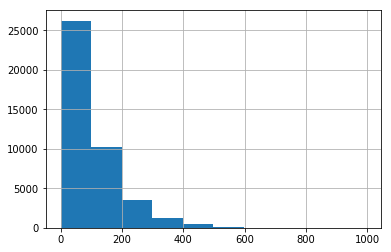

In [5]:
# See the histgram that has a long tail 
prsa["pm2.5"].hist()

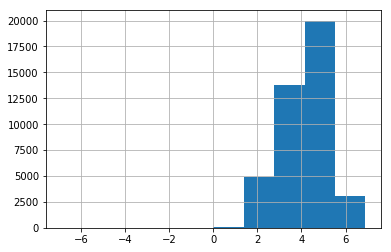

In [6]:
# Take a log makes a normal distribution
prsa["pmlog"].hist()

In [0]:
#The Box-Cox transform is given by:
#
#y = (x**lmbda - 1) / lmbda,  for lmbda > 0
#    log(x),                  for lmbda = 0

from scipy import stats
prsa["pmboxcox"], lmbda = stats.boxcox(prsa["pm2.5"]+0.001)

0.16210311963067547

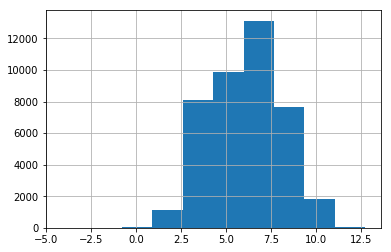

In [11]:
prsa["pmboxcox"].hist()
lmbda

[Rf3e1504535de-1]	I.K. Yeo and R.A. Johnson, “A new family of power transformations to improve normality or symmetry.” Biometrika, 87(4), pp.954-959, (2000).
[Rf3e1504535de-2]	G.E.P. Box and D.R. Cox, “An Analysis of Transformations”, Journal of the Royal Statistical Society B, 26, 211-252 (1964).

PowerTransformerの既定値はYao-Johnson法（負の値もOK)

The Yeo-Johnson transform is given by:

```
y = ((x + 1)**lmbda - 1) / lmbda,                for x >= 0, lmbda != 0
    log(x + 1),                                  for x >= 0, lmbda = 0
    -((-x + 1)**(2 - lmbda) - 1) / (2 - lmbda),  for x < 0, lmbda != 2
    -log(-x + 1),                                for x < 0, lmbda = 2
```

SciPy does not support "reverse" transformation.  We use scikit learn below.

In [9]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data = prsa["pm2.5"].values.reshape(-1,1)
pt.fit( data )
print(pt.lambdas_)
prsa["pmyeo"] = pt.transform(data)

[0.141749]


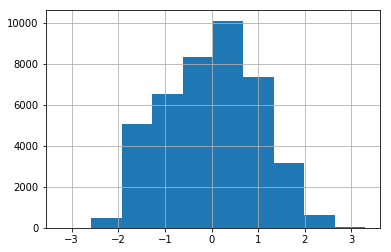

In [15]:
prsa["pmyeo"].hist()

In [18]:
# reverse transformation 
original = pt.inverse_transform(prsa["pmyeo"].values.reshape(-1,1))
original

array([[129.],
       [148.],
       [159.],
       [181.],
       ...,
       [ 10.],
       [ 10.],
       [  8.],
       [ 12.]])

In [19]:
data

array([[129.],
       [148.],
       [159.],
       [181.],
       ...,
       [ 10.],
       [ 10.],
       [  8.],
       [ 12.]])

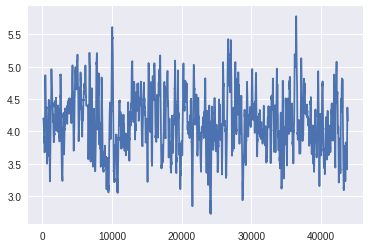

In [0]:
prsa["pmlog"].rolling(24*7).mean().plot()

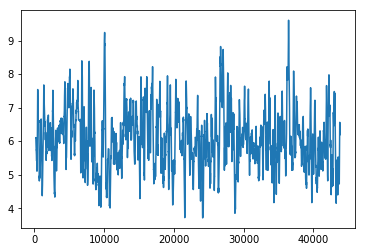

In [0]:
prsa["pmboxcox"].rolling(24*7).mean().plot()

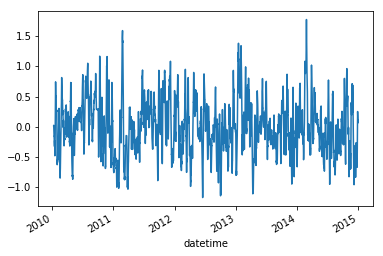

In [0]:
prsa["pmyeo"].rolling(24*7).mean().plot()

In [0]:
prsa.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,pmlog,pmboxcox
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,4.135284,6.058132
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,1.036385,1.992868
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,-6.907755,-4.155656
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,3.367330,4.479143
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,4.276680,6.170344
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,4.919988,7.526597
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,6.901738,12.715104


In [0]:
prsa.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [12]:
!pip install fbprophet

In [0]:
#prsa = pd.read_csv("PRSA.csv")
#prsa.dropna(inplace=True)
prsa["datetime"] = prsa.year.astype(str) + "-" + prsa.month.astype(str) + "-"+prsa.day.astype(str)+" "+prsa.hour.astype(str)+":00:00"
prsa["datetime"] = pd.to_datetime(prsa.datetime)

In [21]:
prsa.set_index("datetime", inplace=True)
prsa.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog,pmboxcox,pmyeo
datetime,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820,7.393668,0.673892
2010-01-02 01:00:00,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4.997219,7.699134,0.826911
2010-01-02 02:00:00,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,5.068910,7.861240,0.907994
2010-01-02 03:00:00,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,5.198503,8.159093,1.056747
2010-01-02 04:00:00,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4.927261,7.542753,0.748611


In [0]:
#df_input = prsa.reset_index().rename(columns={'datetime':'ds', 'pmlog':'y'})

In [0]:
#df_input = prsa.reset_index().rename(columns={'datetime':'ds', 'pmboxcox':'y'})
df_input = prsa.reset_index().rename(columns={'datetime':'ds', 'pmyeo':'y'})


In [23]:
from fbprophet import Prophet
model = Prophet(growth='linear', daily_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df_input[:-2000])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

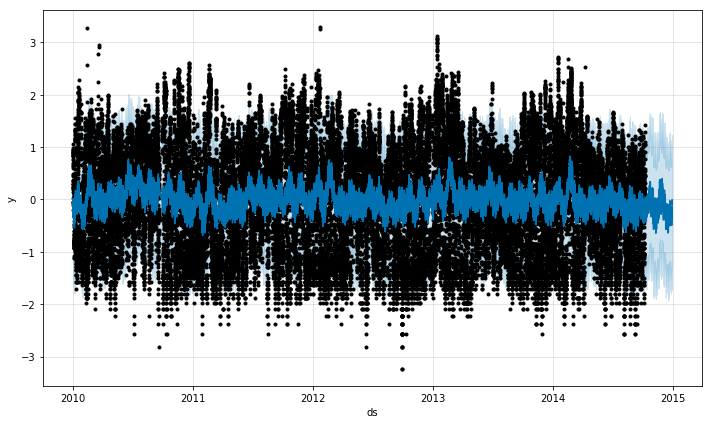

In [25]:
future = model.make_future_dataframe(periods=2000, freq='H')
forecast = model.predict(future)
model.plot(forecast)
plt.show()

In [0]:
# reverse transformation 
prsa["forecast"] = pt.inverse_transform(forecast.yhat.values.reshape(-1,1))

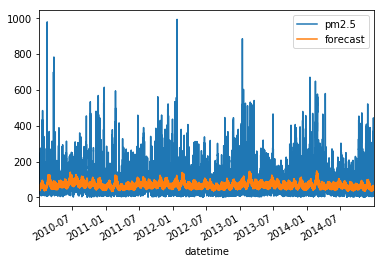

In [38]:
prsa[ ["pm2.5", "forecast"]].plot()

In [0]:
len(forecast.yhat), len(df_input)

(41757, 41757)

In [0]:
 ((forecast.yhat[-2000:]  - df_input["y"][-2000:])**2).mean() 

1.627238182728774

In [0]:
 ((forecast.yhat[-2000:]  - df_input["y"][-2000:])**2).mean() 

5.942066075451669

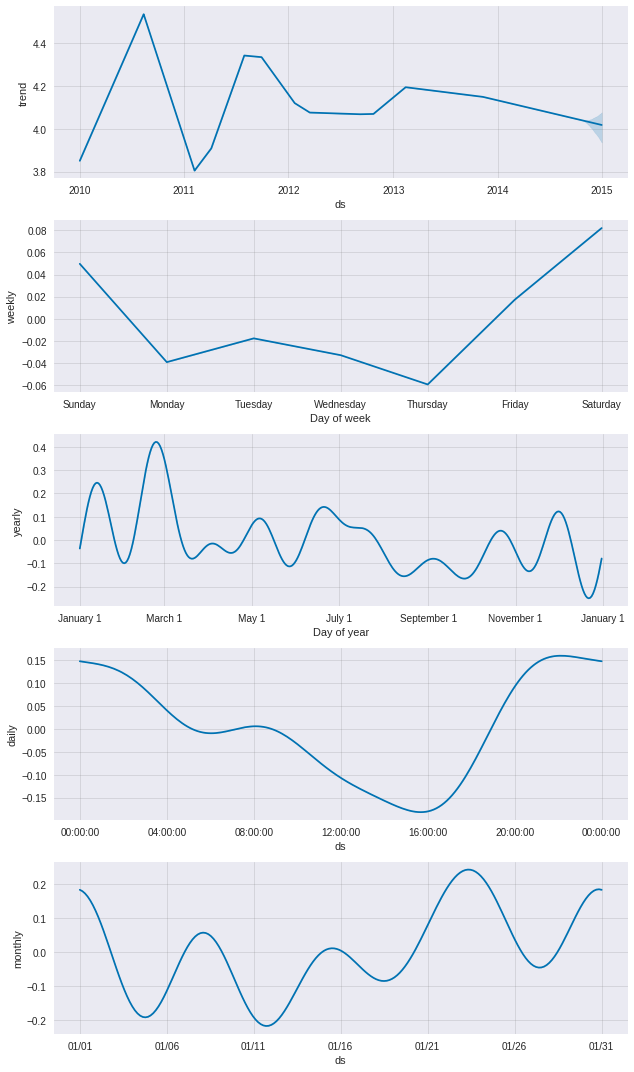

In [0]:
model.plot_components(forecast)
plt.show()

ランダム森で予測

In [0]:
prsa = pd.read_csv("PRSA.csv")
prsa.dropna(inplace=True)
prsa["pmlog"] = np.log(prsa["pm2.5"]+0.001)
prsa.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4.997219
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,5.068910
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,5.198503
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4.927261


In [0]:
prsa2 = pd.get_dummies(prsa, drop_first=True) #ダミー変数の最初のものを除く
prsa2.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,pmlog,cbwd_NW,cbwd_SE,cbwd_cv
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0,4.859820,0,1,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0,4.997219,0,1,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0,5.068910,0,1,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0,5.198503,0,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0,4.927261,0,1,0


In [0]:
train_df = prsa2.iloc[ :-2000, :]

In [0]:
test_df = prsa2.iloc[-2000: , :]

In [0]:
X_train = train_df.drop(["pm2.5","pmlog"], axis=1)
X_train.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
24,25,2010,1,2,0,-16,-4.0,1020.0,1.79,0,0,0,1,0
25,26,2010,1,2,1,-15,-4.0,1020.0,2.68,0,0,0,1,0
26,27,2010,1,2,2,-11,-5.0,1021.0,3.57,0,0,0,1,0
27,28,2010,1,2,3,-7,-5.0,1022.0,5.36,1,0,0,1,0
28,29,2010,1,2,4,-7,-5.0,1022.0,6.25,2,0,0,1,0


In [0]:
y_train = train_df["pmlog"]
y_train.head()

24    4.859820
25    4.997219
26    5.068910
27    5.198503
28    4.927261
Name: pmlog, dtype: float64

In [0]:
X_test = test_df.drop(["pm2.5","pmlog"], axis=1)
y_test = test_df["pmlog"]

In [0]:
from sklearn.ensemble import RandomForestRegressor #ランダム森
forest = RandomForestRegressor()
forest.fit(X_train, y_train)    # 学習
yhat = forest.predict(X_test)   # 予測

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
forest.score(X_test,y_test)

0.6181405371836859

In [0]:
 from sklearn import metrics

In [0]:
metrics.mean_squared_error(y_test, yhat)

0.6570177322490524

日時をそのままカテゴリーデータとした深層学習

In [0]:
prsa = pd.read_csv("PRSA.csv")
prsa.dropna(inplace=True)
prsa["pmlog"] = np.log(prsa["pm2.5"]+0.001)
prsa.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4.997219
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,5.068910
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,5.198503
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4.927261


In [0]:
prsa.drop("pm2.5", axis=1, inplace=True)
procs = [FillMissing, Categorify, Normalize] #前処理の種類を準備．
valid_idx = range(len(prsa)-2000, len(prsa)) #検証用データのインデックスを準備．
dep_var = 'pmlog' #従属変数名とカテゴリー変数が格納されている列リストを準備．
# DataBunchのインスタンスdataを生成．
data = TabularDataBunch.from_df(".", prsa, dep_var, valid_idx=valid_idx, procs=procs, 
                                cat_names=["year", "month", "day", "hour", "DEWP", "cbwd","Is","Ir"])

In [0]:
prsa.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog
24,25,2010,1,2,0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820
25,26,2010,1,2,1,-15,-4.0,1020.0,SE,2.68,0,0,4.997219
26,27,2010,1,2,2,-11,-5.0,1021.0,SE,3.57,0,0,5.068910
27,28,2010,1,2,3,-7,-5.0,1022.0,SE,5.36,1,0,5.198503
28,29,2010,1,2,4,-7,-5.0,1022.0,SE,6.25,2,0,4.927261


In [0]:
#learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)
#learn.lr_find()
learn = tabular_learner(data, layers=[1000,500],ps=[0.001,0.01], emb_drop=0.4, metrics=mean_squared_error)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


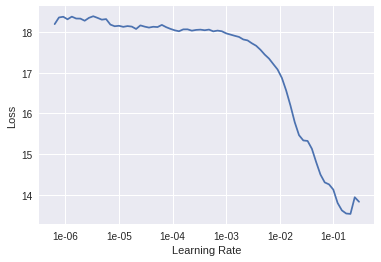

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(30, 1e-2, wd=.4)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.596473,0.864749,0.864749,00:09
1,0.547652,0.673393,0.673393,00:09
2,0.536905,0.610631,0.610631,00:09
3,0.538984,0.683703,0.683703,00:09
4,0.534698,0.754220,0.754220,00:09
5,0.566384,0.677570,0.677570,00:09
6,0.574453,0.873156,0.873156,00:09
7,0.579906,0.654769,0.654769,00:09
8,0.564742,0.796943,0.796943,00:09
9,0.589478,0.682517,0.682517,00:09



埋め込み層を用いた深層学習

add_datepart(df, fldname, drop=True, time=False)

In [0]:
prsa = pd.read_csv("PRSA.csv")
prsa.dropna(inplace=True)
prsa["pmlog"] = np.log(prsa["pm2.5"]+0.001)
prsa.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4.997219
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,5.068910
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,5.198503
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4.927261


In [0]:
prsa["datetime"] = prsa.year.astype(str) + "-" + prsa.month.astype(str) + "-"+prsa.day.astype(str) #+" "+prsa.hour.astype(str)+":00:00"
prsa["datetime"] = pd.to_datetime(prsa.datetime)
prsa.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog,datetime
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820,2010-01-02
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4.997219,2010-01-02
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,5.068910,2010-01-02
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,5.198503,2010-01-02
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4.927261,2010-01-02


In [0]:
prsa.drop(["year", "month", "day"], axis=1, inplace=True)
prsa.head()

,No,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pmlog,datetime
24,25,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,4.859820,2010-01-02
25,26,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4.997219,2010-01-02
26,27,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,5.068910,2010-01-02
27,28,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,5.198503,2010-01-02
28,29,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4.927261,2010-01-02


In [0]:
prsa2 = add_datepart(prsa, "datetime", drop=True, time=False)
prsa2.head()

,No,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,...,datetimeDay,datetimeDayofweek,datetimeDayofyear,datetimeIs_month_end,datetimeIs_month_start,datetimeIs_quarter_end,datetimeIs_quarter_start,datetimeIs_year_end,datetimeIs_year_start,datetimeElapsed
24,25,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,...,2,5,2,False,False,False,False,False,False,1262390400
25,26,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,...,2,5,2,False,False,False,False,False,False,1262390400
26,27,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,...,2,5,2,False,False,False,False,False,False,1262390400
27,28,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,...,2,5,2,False,False,False,False,False,False,1262390400
28,29,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,...,2,5,2,False,False,False,False,False,False,1262390400


In [0]:
prsa2.dtypes

No                            int64
hour                          int64
pm2.5                       float64
DEWP                          int64
TEMP                        float64
PRES                        float64
cbwd                         object
Iws                         float64
Is                            int64
Ir                            int64
datetimeYear                  int64
datetimeMonth                 int64
datetimeWeek                  int64
datetimeDay                   int64
datetimeDayofweek             int64
datetimeDayofyear             int64
datetimeIs_month_end           bool
datetimeIs_month_start         bool
datetimeIs_quarter_end         bool
datetimeIs_quarter_start       bool
datetimeIs_year_end            bool
datetimeIs_year_start          bool
datetimeElapsed               int64
dtype: object

In [0]:
prsa2.columns

Index(['No', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is',
       'Ir', 'datetimeYear', 'datetimeMonth', 'datetimeWeek', 'datetimeDay',
       'datetimeDayofweek', 'datetimeDayofyear', 'datetimeIs_month_end',
       'datetimeIs_month_start', 'datetimeIs_quarter_end',
       'datetimeIs_quarter_start', 'datetimeIs_year_end',
       'datetimeIs_year_start', 'datetimeElapsed'],
      dtype='object')

In [0]:
cat_vars = ["cbwd","Is","Ir","hour", 
                                           'datetimeYear', 'datetimeMonth', 'datetimeWeek', 'datetimeDay',
       'datetimeDayofweek', 'datetimeDayofyear', 'datetimeIs_month_end',
       'datetimeIs_month_start', 'datetimeIs_quarter_end',
       'datetimeIs_quarter_start', 'datetimeIs_year_end',
       'datetimeIs_year_start']
cont_vars = list(set(prsa2.columns) - set(cat_vars) - {"No", "pm2.5","pmlog"}   )    
cont_vars

['TEMP', 'PRES', 'DEWP', 'datetimeElapsed', 'Iws']

In [0]:
procs = [FillMissing, Categorify, Normalize] #前処理の種類を準備．
valid_idx = range(len(prsa2)-2000, len(prsa2)) #検証用データのインデックスを準備．
dep_var = 'pmlog' #従属変数名とカテゴリー変数が格納されている列リストを準備．
# DataBunchのインスタンスdataを生成．
data = TabularDataBunch.from_df(".", prsa2, dep_var, valid_idx=valid_idx, procs=procs, 
                                cont_names=cont_vars,
                                cat_names= cat_vars )

In [0]:
learn = tabular_learner(data, layers=[1000,500],ps=[0.001,0.01], emb_drop=0.04, metrics=mean_squared_error)
#learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


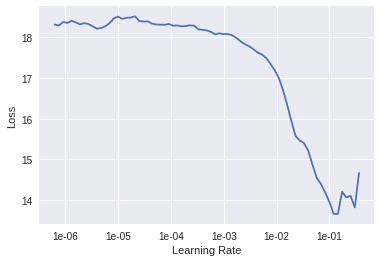

In [0]:
learn.recorder.plot()

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(29, 11)
    (2): Embedding(38, 12)
    (3): Embedding(6, 4)
    (4): Embedding(13, 7)
    (5): Embedding(54, 15)
    (6): Embedding(32, 11)
    (7): Embedding(8, 5)
    (8): Embedding(367, 44)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=137, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(

In [0]:
learn.fit_one_cycle(30, 1e-2, wd=0.4)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.488447,0.583545,0.583545,00:09
1,0.407460,0.842051,0.842051,00:10
2,0.381134,0.764725,0.764725,00:10
3,0.385655,0.905198,0.905198,00:10
4,0.417020,0.701073,0.701073,00:10
5,0.447195,1.258582,1.258582,00:10
6,0.473278,0.980237,0.980237,00:10
7,0.465765,1.054713,1.054713,00:10
8,0.494549,0.843402,0.843402,00:10
9,0.469405,0.786540,0.786540,00:10


In [0]:
learn.save("1")